In [1]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from neural_stylization.vgg19 import VGG_19
from neural_stylization.util.img_util import load_image, image_to_matrix, normalize, denormalize, matrix_to_image

# VGG19 Model

In [2]:
model = VGG_19()
model

VGG_19(include_top=True, input_tensor=None, pooling=max)

In [3]:
model.output_tensors

{'input_1': <KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>,
 'block1_conv1': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>,
 'block1_conv2': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>,
 'block1_pool': <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>,
 'block2_conv1': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>,
 'block2_conv2': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>,
 'block2_pool': <KerasTensor: shape=(None, 56, 56, 128) dtype=float32 (created by layer 'block2_pool')>,
 'block3_conv1': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv1')>,
 'block3_conv2': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv2')>,
 'block3_conv3': <KerasTensor: shape=(None, 

In [4]:
model.count_params()

143667240

In [5]:
# the dimension is sqaure
dim = 224
dim = dim, dim

## Dog

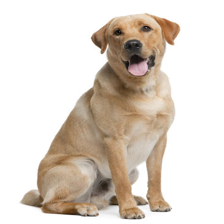

In [6]:
dog = load_image('img/objects/labrador-retriever.jpg', dim)
dog

In [7]:
img = image_to_matrix(dog)
img = normalize(img)
preds = model.predict(img)
decode_predictions(preds, top=3)

[[('n02099712', 'Labrador_retriever', 0.5495233),
  ('n02099601', 'golden_retriever', 0.33772242),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.009994448)]]

## Seahorse

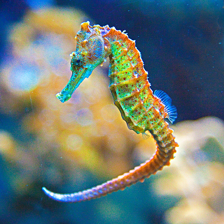

In [8]:
seahorse = load_image('img/objects/seahorse.jpg', dim)
seahorse

In [9]:
img = image_to_matrix(seahorse)
img = normalize(img)
preds = model.predict(img)
decode_predictions(preds, top=3)

[[('n01950731', 'sea_slug', 0.30265212),
  ('n01694178', 'African_chameleon', 0.24486269),
  ('n02317335', 'starfish', 0.18628366)]]

## Oil Tanker

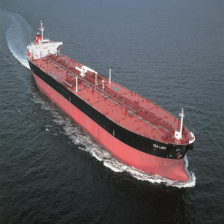

In [10]:
tanker = load_image('img/objects/oil-tanker.jpg', dim)
tanker

In [11]:
img = image_to_matrix(tanker)
img = normalize(img)
preds = model.predict(img)
decode_predictions(preds, top=3)

[[('n03240683', 'drilling_platform', 0.42492682),
  ('n03095699', 'container_ship', 0.2809452),
  ('n03344393', 'fireboat', 0.14057492)]]